In [25]:
%load_ext autoreload
%autoreload 2 

# Set path to find modelling tools for later use
import os
import sys
sys.path.append(os.path.join(os.getcwd(),".."))
import pandas as pd

from IPython.display import display
from src.preprocess import preprocessMRC
from src.plotting import plot_times
import copy
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_raw = pd.read_csv("../data/MRC/MRCData-processed-interpolated.csv")

/Users/nd/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
target_sentences = df_raw.sentence_content.unique()[:,np.newaxis]

In [4]:
target_sentences

array([['Books include Penguin Island, a satire on the Dreyfus affair'],
       ['However, religions other than Islam, use a different pronunciation for Allah, although the spelling is the same'],
       ['The Franks alliance was important exactly because of their renown hostility towards the Byzantine'],
       ['He is buried in Egypt, Aswan at the Mausoleum of Aga Khan'],
       ['The w-shaped glyph above the second consonant that it geminates, is in fact the beginning of a small letter'],
       ['The novel explores the relationship between Patroclus and Achilles from boyhood to the fateful events of the Iliad'],
       ['Generally considered a part of Central Asia, it is sometimes ascribed to a regional bloc in either the Middle East or South Asia'],
       ['Although early behavioural or cognitive intervention can help children gain self-care, social, and communication skills, their is no known cure'],
       ["Lincoln's coffin would be encased in concrete several feet thick, and 

In [5]:
proc = preprocessMRC()
df,df_scaled = proc(robustly_scale=True)

	Medical Research Council funded PD copy-typing data.



/Users/nd/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



Removal of sentences with 'high' Levenshtein distance...

Size of dataframe before row pruning: (433672, 12)
Size of dataframe after row pruning: (433411, 12)

Removal of sentences with left/right arrows keys...

Size of dataframe before row pruning: (433411, 12)
Size of dataframe after row pruning: (414321, 12)
Using mode: MRC_MODE

Total number of study subjects: 229
Number of sentences typed by PD patients: 1415
Number of sentences typed by controls: 1862
Average sentence length: 120.30
Minimum sentence length: 51
Maximum sentence length: 241


In [6]:
df.head()

,Participant_ID,Diagnosis,Sentence_ID,Preprocessed_typed_sentence,locations,IKI_timings,PPTS_list,hold_time,pause_time
0,11,1,1,"boosωkss includde penguiin islaand, a satiree ...",0000000000000000000000000000000000000000000000...,"[288.70000000001164, 149.6999999999971, 355.59...","[b, o, o, s, ω, k, s, s, , i, n, c, l, u, d, ...","[103.70000000001164, 61.19999999999709, 126.39...","[185.0, 88.5, 229.1999999999971, 385.699999999..."
1,11,1,2,"however, religioosωns otheertω than islam, use...",0000000000000000000000000000000000000000000000...,"[692.1000000000022, 150.5, 269.7000000000007, ...","[h, o, w, e, v, e, r, ,, , r, e, l, i, g, i, ...","[31.600000000002183, 76.79999999999927, 124.09...","[660.5, 73.70000000000073, 145.60000000000218,..."
2,11,1,3,the franks alliancee was importantt eaωxactly...,0000000000000000000000000000000000000000000000...,"[252.60000000000582, 112.39999999999418, 174.3...","[t, h, e, , f, r, a, n, k, s, , a, l, l, i, ...","[114.30000000001746, 97.20000000001164, 104.20...","[138.29999999998836, 15.199999999982538, 70.19..."
3,11,1,4,"hsωe is burieed in eωegypt, aswamωn at thee m...",0000000000000000000000000000000000000000000000...,"[433.79999999999563, 601.5999999999985, 290.5,...","[h, s, ω, e, , i, s, , b, u, r, i, e, e, d, ...","[140.29999999999563, 65.0, 126.5, 102.10000000...","[293.5, 536.5999999999985, 164.0, 158.29999999..."
4,11,1,5,the w-shaped glpyh above thee seecondd connsnω...,0000000000000000000000000000000000000000000000...,"[285.1000000000058, 145.1999999999971, 214.599...","[t, h, e, , w, -, s, h, a, p, e, d, , g, l, ...","[145.60000000000582, 126.69999999999709, 85.09...","[139.5, 18.5, 129.5, 37.29999999998836, 139.39..."


In [7]:
df_scaled.head()

,Participant_ID,Diagnosis,Sentence_ID,Preprocessed_typed_sentence,locations,IKI_timings,PPTS_list,hold_time,pause_time
0,11,1,1,"boosωkss includde penguiin islaand, a satiree ...",0000000000000000000000000000000000000000000000...,"[0.9809981206931685, -0.17999582376292408, 1.5...","[b, o, o, s, ω, k, s, s, , i, n, c, l, u, d, ...","[0.17881944444528, -0.5590277777773067, 0.5729...","[0.9672875965468078, 0.09041344843236661, 1.36..."
1,11,1,2,"however, religioosωns otheertω than islam, use...",0000000000000000000000000000000000000000000000...,"[4.350386301941569, -0.17331384422646254, 0.82...","[h, o, w, e, v, e, r, ,, , r, e, l, i, g, i, ...","[-1.0729166666661851, -0.2881944444438944, 0.5...","[5.288050885960454, -0.04407087687429756, 0.60..."
2,11,1,3,the franks alliancee was importantt eaωxactly...,0000000000000000000000000000000000000000000000...,"[0.6794737941113892, -0.4915431196493349, 0.02...","[t, h, e, , f, r, a, n, k, s, , a, l, l, i, ...","[0.3628472222231867, 0.06597222222304067, 0.18...","[0.5429350295317341, -0.5756474329852899, -0.0..."
3,11,1,4,"hsωe is burieed in eωegypt, aswamωn at thee m...",0000000000000000000000000000000000000000000000...,"[2.19294215911434, 3.594487366882076, 0.996032...","[h, s, ω, e, , i, s, , b, u, r, i, e, e, d, ...","[0.8142361111117651, -0.49305555555502395, 0.5...","[1.9532030895044956, 4.16219900045392, 0.77646..."
4,11,1,5,the w-shaped glpyh above thee seecondd connsnω...,0000000000000000000000000000000000000000000000...,"[0.9509292127791522, -0.2175819586553836, 0.36...","[t, h, e, , w, -, s, h, a, p, e, d, , g, l, ...","[0.9062500000008448, 0.5781250000006435, -0.14...","[0.5538391640161646, -0.5456610631532385, 0.46..."


### Plots

In [ ]:
# Robustly scaled IKI plots instead -> wanna make a big deal about this
# Robust scaled one vs normal one

In [ ]:
# Dict contains sentence ID on key, the first item in list is the char-count per sentence to display, the other two numbers are the min and max of the vertical axis
sentence_stats = {1:[13,-200, 800],
                  2:[8,-200, 1200],
                  3:[10,-200, 1000],
                  4:[12,-200, 800],
                  5:[12,-200, 1200],
                  6:[9,-200, 800],
                  7:[10,-300, 800],
                  8:[9,-200, 800],
                  9:[10,-200, 1200],
                  10:[12,-200, 1200],
                  11:[9,-200, 800],
                  12:[12,-200, 800],
                  13:[11,-200, 800],
                  14:[11,-200, 1000],
                  15:[13,-200, 1200]}
    
plot_times(out,
           target_sentences,
           sentence_stats,
           save_me=False)


Sentence: 14

This is the target sentence: ['The Korean men have not fared so well in Olympic competition but still produce good results']
Chars to consider: ['t', 'h', 'e', ' ', 'k', 'o', 'r', 'e', 'a', 'n', ' ']

This is the target sentence: ['The Korean men have not fared so well in Olympic competition but still produce good results']
Chars to consider: ['t', 'h', 'e', ' ', 'k', 'o', 'r', 'e', 'a', 'n', ' ']



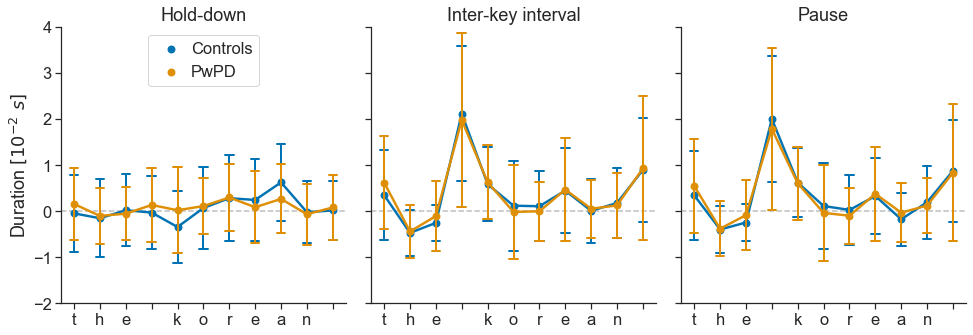

In [26]:
plot_times(df_scaled, target_sentences, {14:[11,-2, 4]})

## Sentence 1
- Books include (we already have this)
- include penguin
- on the Dreyfus
## Sentence 2
- Religions other
- different pronunciation
## Sentence 3
- Important exactly
- Renown hostility towards
- Byzantine
## Sentence 4
- He is buried (already have this)
- Mausoleum
- Egypt
## Sentence 5
- glyph above
- Is in fact the beginning
- consonant

In [46]:
target_sentences

array([['Books include Penguin Island, a satire on the Dreyfus affair'],
       ['However, religions other than Islam, use a different pronunciation for Allah, although the spelling is the same'],
       ['The Franks alliance was important exactly because of their renown hostility towards the Byzantine'],
       ['He is buried in Egypt, Aswan at the Mausoleum of Aga Khan'],
       ['The w-shaped glyph above the second consonant that it geminates, is in fact the beginning of a small letter'],
       ['The novel explores the relationship between Patroclus and Achilles from boyhood to the fateful events of the Iliad'],
       ['Generally considered a part of Central Asia, it is sometimes ascribed to a regional bloc in either the Middle East or South Asia'],
       ['Although early behavioural or cognitive intervention can help children gain self-care, social, and communication skills, their is no known cure'],
       ["Lincoln's coffin would be encased in concrete several feet thick, and 

# New implementation of plotting function

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame


Sentence: 1

This is the target sentence: books include penguin island, a satire on the dreyfus affair
Sub-string to consider: include penguin

This is the target sentence: books include penguin island, a satire on the dreyfus affair
Sub-string to consider: include penguin



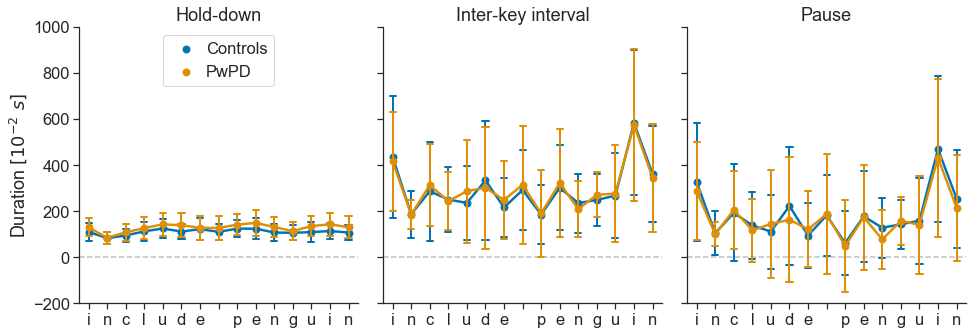

In [53]:
plot_times(df, target_sentences, {1:['include penguin',-200, 1000]})


Sentence: 1

This is the target sentence: books include penguin island, a satire on the dreyfus affair
Sub-string to consider: include penguin

This is the target sentence: books include penguin island, a satire on the dreyfus affair
Sub-string to consider: include penguin



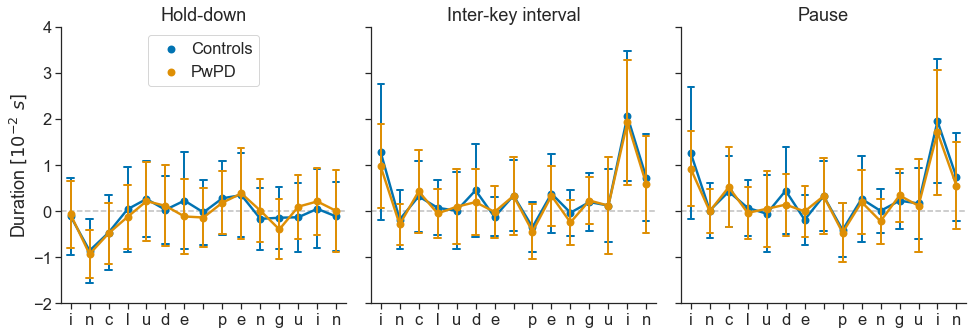

In [55]:
plot_times(df_scaled, target_sentences, {1:['include penguin',-2, 4]})

In [51]:
def get_sentence_stats(df, target_sentence, sentence_id, diagnosis, sub_str):

    print("This is the target sentence: {}".format(target_sentence))
    print("Sub-string to consider: {}\n".format(sub_str))

    # Get the index of the sub-string in the target sentence
    first_char_idx = target_sentence.find(sub_str)
    # Length of sub-string
    n = len(sub_str)
    idxs = range(n)
    sub_str_idx = range(first_char_idx, first_char_idx + n)

    iki_stats = {k: [] for k in idxs}
    hold_time_stats = {k: [] for k in idxs}
    pause_time_stats = {k: [] for k in idxs}

    # Get the unique number of subjects
    subjects = sorted(set(df.Participant_ID))  # NOTE: set() is weakly rando
    # Loop over subjects
    for subject in subjects:
        # Not all subjects have typed all sentences hence we have to do it this way
        if (
            str(sentence_id)
            in df.loc[(df.Participant_ID == subject) & (df.Diagnosis == diagnosis)].Sentence_ID.unique()
        ):
            # Sentence has been typed so we collect the stats

            # Locate df segment to extract
            coordinates = (df.Participant_ID == subject) & (df.Sentence_ID == str(sentence_id))

            # To make more sense of the statistics we only collect it _if_ the subject has typed same character
            # the reference sentence.
            typed_sentence = df.loc[coordinates, "Preprocessed_typed_sentence"].item()
            iki = df.loc[coordinates, "IKI_timings"].item()
            hold_time = df.loc[coordinates, "hold_time"].item()
            pause_time = df.loc[coordinates, "pause_time"].item()

            # Find char stats
            for i, j in enumerate(sub_str_idx):
                if typed_sentence[j] == sub_str[i]:
                    iki_stats[i].append(iki[i])
                    hold_time_stats[i].append(hold_time[i])
                    pause_time_stats[i].append(pause_time[i])

    return iki_stats, hold_time_stats, pause_time_stats


def create_dataframe_for_plotting(dict_times, ref_chars, assigned_diagnosis):
    times = []
    chars = []
    diagnosis = []
    idxs = range(len(ref_chars))
    for i, c in enumerate(idxs):
        n = len(dict_times[i])
        chars.extend(n * [c])
        times.extend(dict_times[i])
        diagnosis.extend(n * [assigned_diagnosis])

    return DataFrame(data=list(zip(chars, times, diagnosis)), columns=["key", "time", "Class"])


def create_binary_dataframe(control_times, pd_times, ref_chars):
    A = create_dataframe_for_plotting(control_times, ref_chars, assigned_diagnosis="Controls")
    B = create_dataframe_for_plotting(pd_times, ref_chars, assigned_diagnosis="PwPD")
    return A.append(B)


def get_plotting_data(df, target_sentence, sent_ID, sub_str):

    iki_0, hold_time_0, pause_time_0 = get_sentence_stats(
        df, target_sentence=target_sentence, sentence_id=sent_ID, diagnosis=0, sub_str=sub_str
    )
    iki_1, hold_time_1, pause_time_1 = get_sentence_stats(
        df, target_sentence=target_sentence, sentence_id=sent_ID, diagnosis=1, sub_str=sub_str
    )

    # Make dataframe
    A = create_binary_dataframe(hold_time_0, hold_time_1, sub_str)
    B = create_binary_dataframe(iki_0, iki_1, sub_str)
    C = create_binary_dataframe(pause_time_0, pause_time_1, sub_str)
    A["type"] = "Hold-down"
    B["type"] = "Inter-key interval"
    C["type"] = "Pause"
    tmp = A.append(B)  # Replace with concat

    return tmp.append(C)


def time_plot(df, ref_chars, sent_ID, y_min, y_max, save_me=False):
    sns.set_context("notebook", font_scale=1.5)
    sns.set_style("ticks")
    g = sns.catplot(
        x="key",
        y="time",
        hue="Class",
        data=df,
        col="type",
        capsize=0.33,
        palette="colorblind",
        scale=0.9,
        height=5,
        legend_out=False,
        aspect=0.9,
        kind="point",
        lw=6,
        errwidth=2.0,
        ci="sd",
    )

    g.map(plt.axhline, y=0, lw=1.5, ls="--", c="0.75", zorder=0)
    g.set(ylim=(y_min, y_max))
    g.fig.get_axes()[0].legend(loc="upper center", handletextpad=0.2, ncol=1)
    g.set(xticklabels=ref_chars)
    g.set_titles("{col_name}")
    g.set_xlabels("")
    g.set_ylabels("Duration $[10^{-2} \ s]$")

    if save_me:
        save_to = "../figures/time_plots/time_plot_sentence_ID_" + str(sent_ID) + ".pdf"
        plt.savefig(save_to, bbox_inches="tight")
        plt.close()

    plt.show()


def plot_times(df, target_sentences, sentence_stats, save_me=False):
    """Function which plots the time-dynamics plot for all sentences.

    Parameters
    ----------
    df : pandas dataframe
        Preprocessed MRC data.
    target_sentences : np.array
        Array containing all the target sentences used for copy-typing.
    sentence_stats : dict
        Contains all the plotting options for each sentence.
    save_me : bool, optional
        Call to save the plots or not.

    Notes
    -----
    As of 15/07/2020 the follwing sentence_stats take the following form:

    sentence_stats = {1:['Books include',-200, 800]}
    """
    for sent_ID in sentence_stats.keys():
        print("\nSentence: {}\n".format(sent_ID))
        sub_str, y_min, y_max = sentence_stats[sent_ID]
        df_plot = get_plotting_data(df, target_sentences[sent_ID - 1].item().lower(), sent_ID, sub_str.lower())
        time_plot(df_plot, sub_str, sent_ID, y_min, y_max, save_me=save_me)